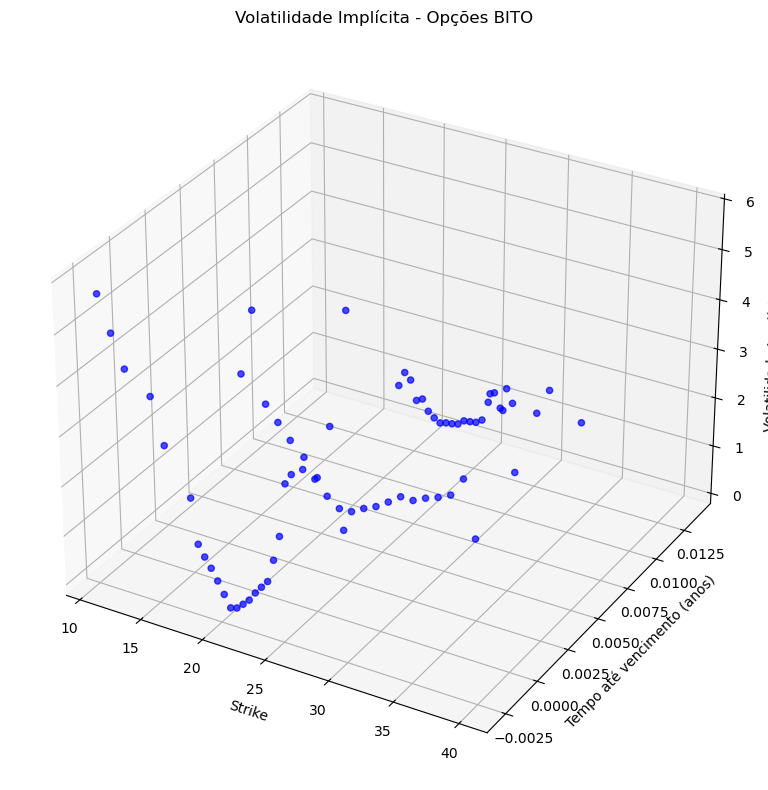

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# === Baixar dados das opções de BITO para os 3 próximos vencimentos ===
ticker = yf.Ticker("BITO")
expirations = ticker.options[:3]
now = datetime.now()

dados = []
for exp in expirations:
    calls = ticker.option_chain(exp).calls
    ttm = (datetime.strptime(exp, '%Y-%m-%d') - now).days / 365
    for _, row in calls.iterrows():
        iv = row['impliedVolatility']
        if pd.notna(iv):
            dados.append({
                'strike': row['strike'],
                'ttm': ttm,
                'iv': iv
            })

df = pd.DataFrame(dados)

# === Plot 3D da Volatilidade Implícita ===
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['strike'], df['ttm'], df['iv'], c='blue', alpha=0.7)

ax.set_xlabel('Strike')
ax.set_ylabel('Tempo até vencimento (anos)')
ax.set_zlabel('Volatilidade Implícita (IV)')
plt.title('Volatilidade Implícita - Opções BITO')
plt.tight_layout()

# === Salvar o gráfico como imagem PNG ===
plt.savefig("bito_iv_plot.png", dpi=300)

# === Mostrar o gráfico ===
plt.show()
